<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2021 Analysing our spectra</h2>

In this exercise we will look at the spectra of three objects that we took as part of the class: M57 - a planetary nebula, Jupiter as seen in reflected sunlight, and the star Vega.

There are 5 problems.  This assignment is worth 50 points.

**Due on Dec. 10 at 12:00pm**

In [5]:
import astropy.units as u
from astropy.table import unique, Table
import numpy as np
from matplotlib import pyplot as plt
import os
from specutils import Spectrum1D
from numpy.random import uniform
import matplotlib.transforms as transforms

In [6]:
#this subroutine will allow us to draw lines on our spectra
def lineplot(linelist):
    transDA = transforms.blended_transform_factory(
    ax.transData, ax.transAxes) #  from the transforms tutorial

    for line in linelist:
        if((line[1]>lammin) & (line[1]<lammax)):
            plt.axvline(linewidth=0.5,color='r',x=line[1])
            plt.text(line[1], #wavelength from list
                     uniform(0.5,1), # wiggle the labels so they don't overlap
                     line[0], # string label
                     transform=transDA,
                     color='red',
                     family='serif')

### Identify features in spectrum of M57

In this exercise you will identify various components of the spectrum of M57.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

1. **Problem** -  Uncomment all the spectral features in the "linelist" variable that correspond to clear features in the spectrum.    *Note: Not all features have line designations in my list*

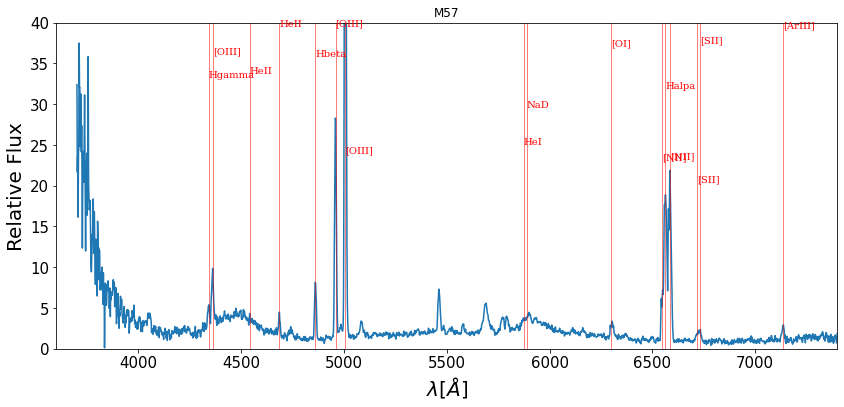

In [7]:
#read in the three spectra we took
m57_path = 'M57_Object_CROP.fit'
vega_path ='Vega_Object_CROP.fit'
jup_path = 'Jupiter_Object_CROP.fit'

specm57 = Spectrum1D.read(m57_path)
specjup = Spectrum1D.read(jup_path)
specvega = Spectrum1D.read(vega_path)

#plot the M57 spectrum
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.title('M57')

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
#fluxmin = 0
#fluxmax = 40
#lammin = 3600
#lammax = 7400
#ax.set_ylim([fluxmin,fluxmax])
#ax.set_xlim([lammin,lammax])

fluxmin = 0
fluxmax = 40
lammin = 3600
lammax = 7400
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

#***************************
#Uncomment all of the lines that correspond to identifiable features in the spectra
linelist = [
#     ('[OII]',3727),
     ('[OIII]',4363),
     ('[OIII]',4959),
     ('[OIII]',5007),
     ('[OI]',6300),
#     ('[OI]',6363),
     ('[NII]',6548),
     ('[NII]',6584),
     ('[SII]',6716),
     ('[SII]',6731),
#     ('CIII',4647),
#     ('MgI',5170),
#     ('FeI', 5270),
#     ('Hepsilon',3970),
#     ('Hdelta',4103),
     ('Hgamma',4341),
     ('Hbeta',4861),
     ('Halpa',6563),
     ('NaD', 5890),
     ('HeII',4541),
     ('HeII',4686),
#     ('HeI',4471),
     ('HeI',5875),
#     ('HeI',7065),
     ('[ArIII]',7135),
#     ('FeI',5335)
]

#draw lines on the spectrum
lineplot(linelist)

2. **Problem** -  Our slit went right through the center of the planetary nebula.  Using what you know about the composition of planetary nebula (not necessarily from this class), describe here from where the broad emission lines and sharp rise in flux at the blue end of the planetary nebula come from.
**answer here**

Because the slit went through the entire nebula, our spectra includes the incredibly hot Hydrogen from the Balmer series that was expelled from the proto-white dwarf, causing the sharp rise in flux at the blue wavelengths. The broad emission lines come from the proto-white dwarf.

### Identify features in spectrum of Jupiter

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

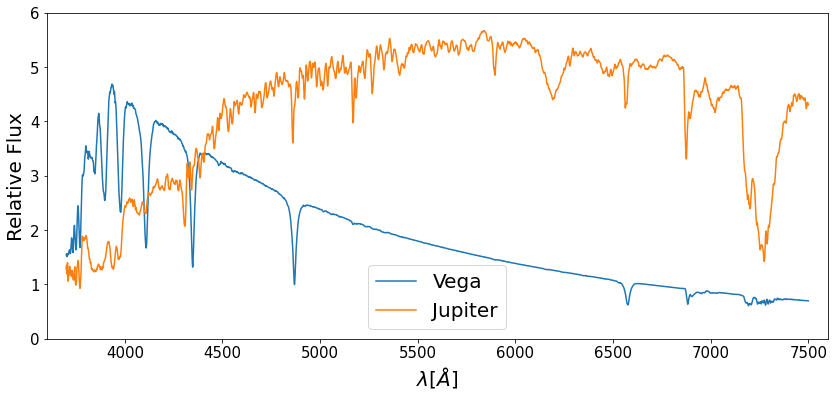

In [29]:
#plot Vega and Jupiter, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scaling
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specvega.wavelength,specvega.flux,label="Vega")
plt.plot(specjup.wavelength,specjup.flux*5,label="Jupiter")

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
#fluxmin = 0
#fluxmax = 6
#lammin = 3600
#lammax = 7600
#ax.set_ylim([fluxmin,fluxmax])
#ax.set_xlim([lammin,lammax])

fluxmin = 0
fluxmax = 6
lammin = 3600
lammax = 7600
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)


3. **Problem** -  Using what you know about the spectral lines in an A0V star and the spectrum of Vega plotted below identify as many of the lines as you can in the spectrum of Jupiter.  By "identify" I mean give the wavelength, the name of the element of the line, and which transition of that line.  If you think you should fine a line and can't write why it isn't there. *Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored*
**answer here**

H-alpha: 6575$\mathring A$ 3-2

H-beta: 4870$\mathring A$ 4-2

H-gamma: 4340$\mathring A$ 5-2

H-delta: 4110$\mathring A$ 6-2

Additionally:
H-10: 3787$\mathring A$ 10-2 and H-11: 3760$\mathring A$ 11-2, but I'm unsure this makes sense physically because I don't think Jupiter should be hot enough for these absorption lines. Also, the scale for A0V stars I have only goes up to H-9, but the dips in the graph exist, so I'm not sure if these are actual absorption lines.

### Discuss the physical conditions that drive line formation

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

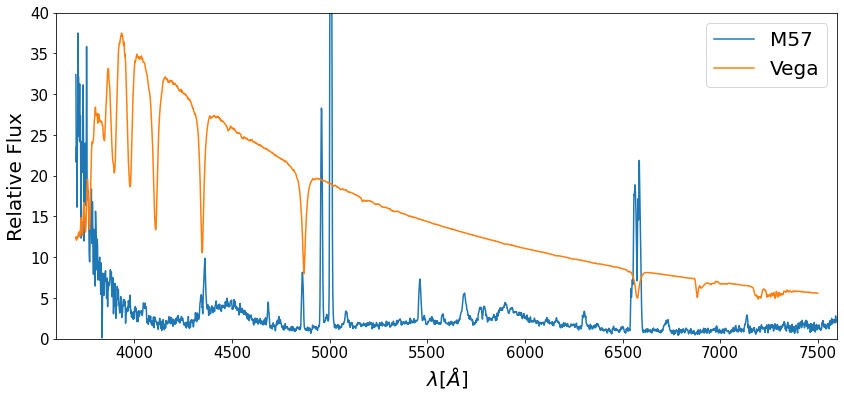

In [39]:
#plot Vega and M57, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scalingplt.figure(figsize = (14,6))
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.plot(specvega.wavelength,specvega.flux*8,label="Vega")

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
#fluxmin = 0
#fluxmax = 40
#lammin = 3600
#lammax = 7600
#ax.set_ylim([fluxmin,fluxmax])
#ax.set_xlim([lammin,lammax])

fluxmin = 0
fluxmax = 40
lammin = 3600
lammax = 7600
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)

4. **Problem** -  There are lines in common between M57 and Vega but they are in absorption in Vega and in Emission in M57. 
**(a)** Identify the lines in common.  *Note that there may be small wavelength shits between the two spectrum because of imperfect wavelength calibration.*

**(b)** Explain why they are in emission in one spectrum and in absorption in the other.  Use your knowledge of Kirkhoffs laws.

*Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored*

**answer here**

(a)

H-alpha: ~6580$\mathring A$

H-beta: ~4870$\mathring A$

H-gamma: ~4350$\mathring A$

(b)

Vega has absorption lines and M57 has emission lines due the properties of the objects they are; as a star, Vega is a hot source of continuous spectrum through a cool medium which produces absorption lines, while M57, as a nebula, is a hot source with a cool background which produces emission lines.

### Discuss the origins of Jupiter's spectrum

See below the graph for the question

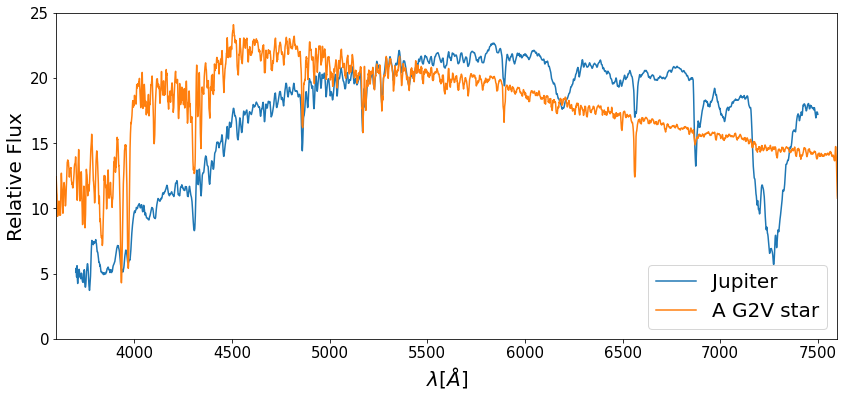

In [41]:
#this is a comparison star from a library similar to that we used in our 
#very first spectral exercise.
starpath = '95128.txt'  #G2V
star1 = Table.read(starpath,format='ascii', names=('lambda','flam'))

#plot Jupiter
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specjup.wavelength,specjup.flux*20,label="Jupiter")

#smooth the comparison stellar spectrum so that the many spectral features
#don't make the comparison difficult.  We use a boxcar filter of size "kernel_size"
#**********
#If you'd like you can play with the kernel size, but it is not required.
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
star1convflam = np.convolve(star1['flam'], kernel, mode='same')
#plot the convolved spectrum
plt.plot(star1['lambda'],star1convflam*20, label = 'A G2V star')

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
#fluxmin = 0
#fluxmax = 25
#lammin = 3600
#lammax = 7600
#ax.set_ylim([fluxmin,fluxmax])
#ax.set_xlim([lammin,lammax])

fluxmin = 0
fluxmax = 25
lammin = 3600
lammax = 7600
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)


5. **Problem** - In this exercise you see a comparison of Jupiter's spectrum to that of a G2V star similar to the sun.  All the visible light we see from Jupiter is reflected sunlight.  Do your best given your knowledge of how light propogates through media to describe why Jupiter's spectrum is significantly redder than that of the sun.  

*As an aside, note that the very wide absorption lines longward of 6000$\mathring A$ in Jupiter's spectrum are absorption bands from molecules in Jupiter's atmosphere.  These bands absorb light over a wide wavelength range.*

**answer here**

Light from Jupiter is reflected sunlight, so the light from the Sun first must hit Jupiter and then any light redirected in our path is what is seen. In this case, Jupiter acts as the cool gas in which absorption lines are produced. However, Jupiter's atmosphere must cause Rayleigh scattering, so there is light from bluer wavelengths that is "lost" (scattered elsewhere) when redirected towards Earth, hence we see redder wavelengths than we "should".